In [96]:
import pandas as pd

In [97]:
df=pd.read_csv('/content/drive/MyDrive/ML/Mall_Customers.csv')

In [98]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [99]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [100]:
df.shape

(200, 5)

In [101]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [102]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [104]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [105]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [106]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [107]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [108]:
df.drop(['CustomerID'], axis = 1, inplace= True)

In [109]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
import warnings
warnings.filterwarnings('ignore')

<Figure size 1152x720 with 0 Axes>

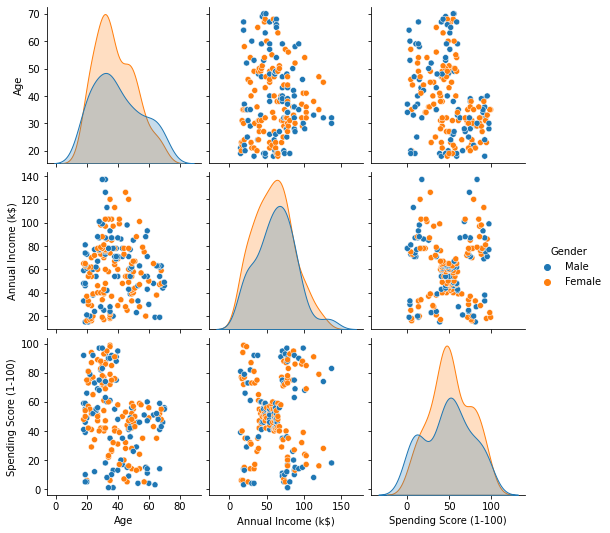

In [112]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.show()

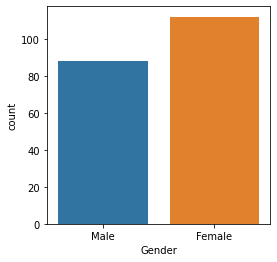

In [113]:
plt.figure(1, figsize=(4,4))
sns.countplot(x='Gender', data=df)
plt.show()

In [114]:
df['Gender'] = df['Gender'].map({'Male': 1, "Female": 0})

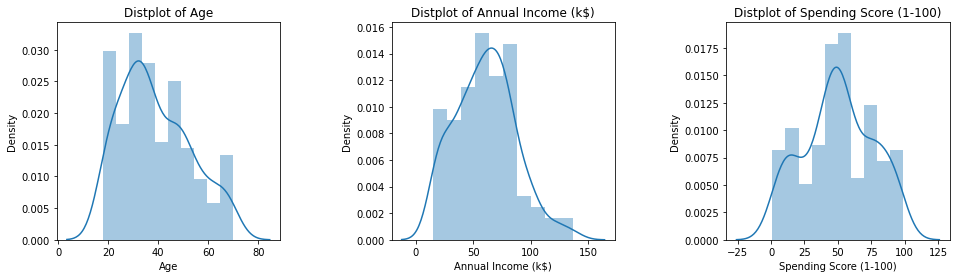

In [115]:
plt.figure(1, figsize=(16,4))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

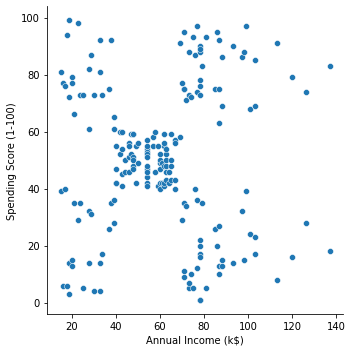

In [116]:
sns.relplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)

In [117]:
import missingno as msno


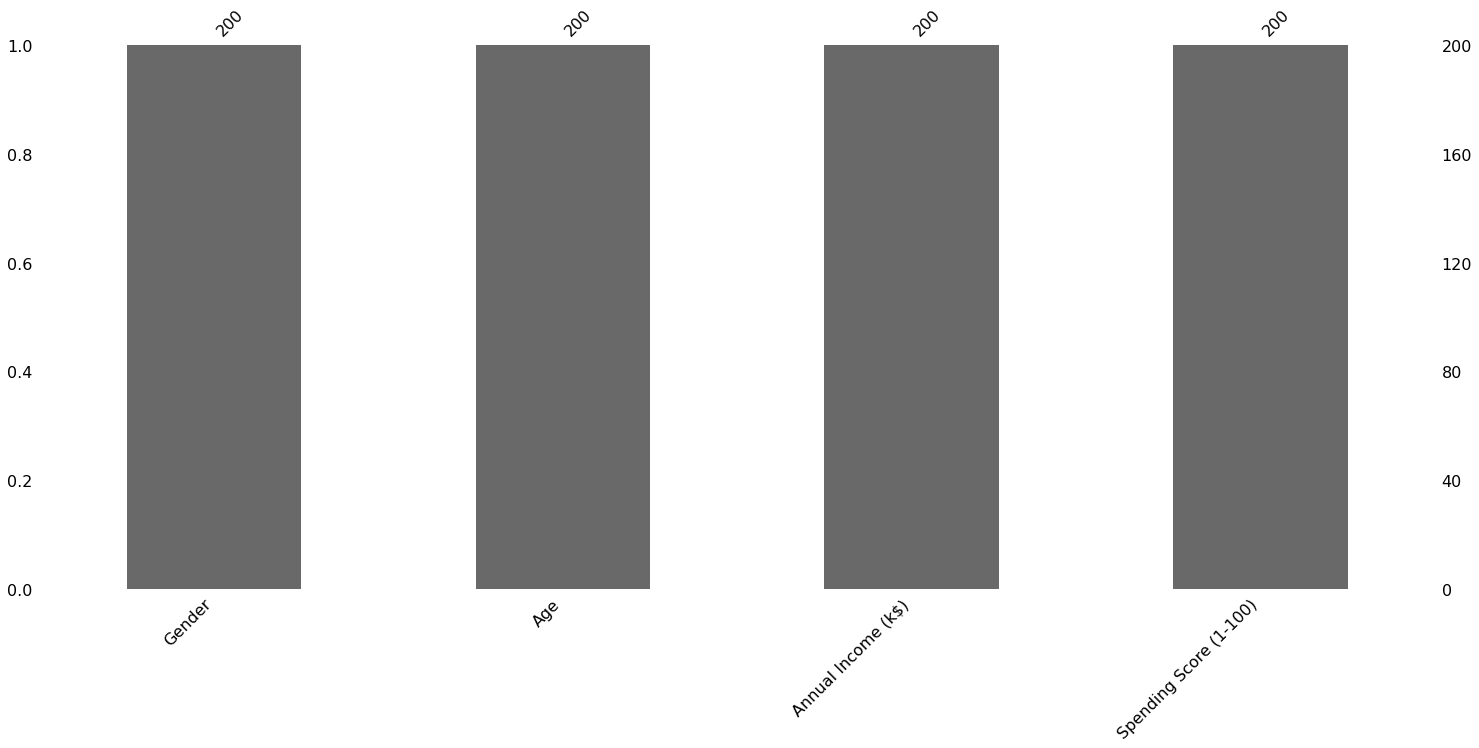

In [118]:
msno.bar(df)

In [119]:
df[df.Gender == 1]  #Male

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
8,1,64,19,3
10,1,67,19,14
14,1,37,20,13
...,...,...,...,...
187,1,28,101,68
192,1,33,113,8
197,1,32,126,74
198,1,32,137,18


In [120]:
df[df.Gender == 0] #Female

,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
...,...,...,...,...
191,0,32,103,69
193,0,38,113,91
194,0,47,120,16
195,0,35,120,79


In [121]:
df[df.Age == df.Age.min()]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
33,1,18,33,92
65,1,18,48,59
91,1,18,59,41
114,0,18,65,48


In [122]:
df[df.Age == df.Age.max()]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
60,1,70,46,56
70,1,70,49,55


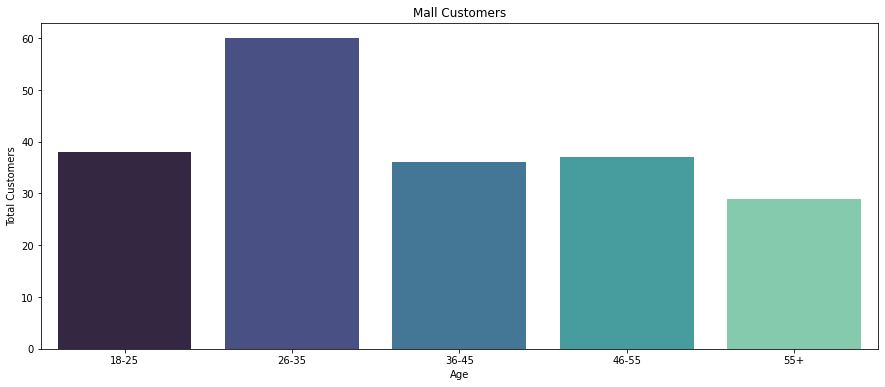

In [123]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_above_55 = df.Age[(df.Age >= 56)]
agex = ['18-25', '26-35', '36-45','46-55','55+']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above_55.values)]
plt.figure(figsize = (15,6))
sns.barplot(x = agex, y = agey , palette='mako')
plt.title('Mall Customers')
plt.xlabel('Age')
plt.ylabel('Total Customers')
plt.show()

In [124]:
df['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

In [125]:
df.groupby(['Gender'])['Age'].sum().sort_values(ascending=False)[:5]

Gender
0    4267
1    3503
Name: Age, dtype: int64

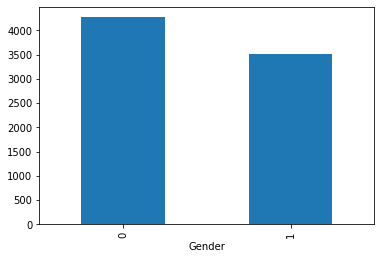

In [126]:
df.groupby(['Gender'])['Age'].sum().plot(kind='bar')

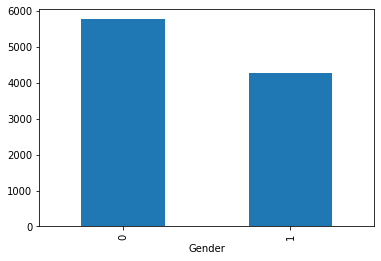

In [127]:
df.groupby(['Gender'])['Spending Score (1-100)'].sum().plot(kind='bar')

In [128]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [129]:
km_inertias, km_scores = [], []

for k in range(3, 10):
    km = KMeans(n_clusters=k).fit(df)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(df, km.labels_))
    print(f"Processing K-Means with k = {k}, Intertia = {km.inertia_}, Silhoutte Score = {silhouette_score(df, km.labels_)}")

Processing K-Means with k = 3, Intertia = 143391.59236035676, Silhoutte Score = 0.383798873822341
Processing K-Means with k = 4, Intertia = 104414.67534220168, Silhoutte Score = 0.4052954330641215
Processing K-Means with k = 5, Intertia = 75412.59682443162, Silhoutte Score = 0.44482259384548795
Processing K-Means with k = 6, Intertia = 58364.968600027416, Silhoutte Score = 0.4513562828608042
Processing K-Means with k = 7, Intertia = 51165.18423710792, Silhoutte Score = 0.43946743327036053
Processing K-Means with k = 8, Intertia = 44355.31351771351, Silhoutte Score = 0.427541566977401
Processing K-Means with k = 9, Intertia = 40663.67315640882, Silhoutte Score = 0.41457740954617534


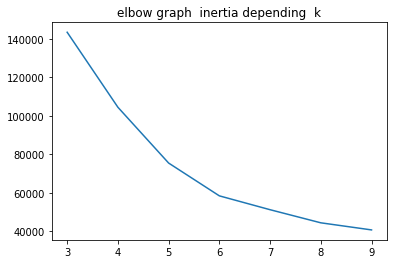

In [130]:
sns.lineplot(range(3, 10), km_inertias)
plt.title('elbow graph  inertia depending  k')
plt.show()

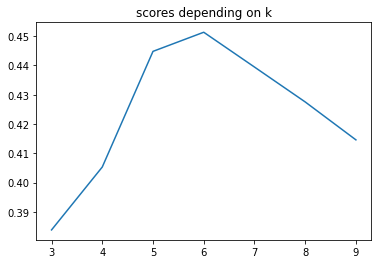

In [131]:
sns.lineplot(range(3, 10), km_scores)
plt.title('scores depending on k')
plt.show()

In [132]:
km = KMeans(n_clusters=6).fit(df)

In [133]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [134]:
df['Label'] = km.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2


In [135]:
df['Label'].unique()

array([4, 3, 0, 5, 1, 2], dtype=int32)

In [136]:
df['Label'].value_counts()

0    45
1    39
5    38
2    35
3    22
4    21
Name: Label, dtype: int64

In [137]:
import numpy as np

In [138]:
pivot = df.pivot_table(values=['Annual Income (k$)', 'Spending Score (1-100)', 'Age'], index=['Label'], aggfunc=np.mean)
pivot

,Age,Annual Income (k$),Spending Score (1-100)
Label,,,
0,56.155556,53.377778,49.088889
1,32.692308,86.538462,82.128205
2,41.685714,88.228571,17.285714
3,25.272727,25.727273,79.363636
4,44.142857,25.142857,19.523810
5,27.000000,56.657895,49.131579


In [139]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2


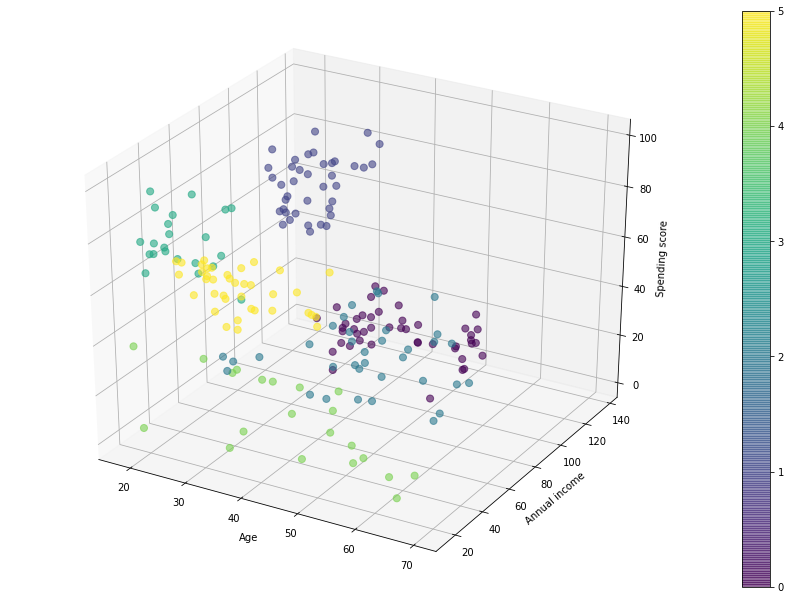

In [140]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

xs = df['Age']
ys = df['Annual Income (k$)']
zs = df['Spending Score (1-100)']
im = ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km.labels_)
fig.colorbar(im, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Annual income')
ax.set_zlabel('Spending score')

plt.show()

In [141]:
df.Label.value_counts()

0    45
1    39
5    38
2    35
3    22
4    21
Name: Label, dtype: int64

In [142]:
for k in range(6):
    print(f'Cluster nb : {k}')
    print(df[df.Label == k].describe().iloc[:, 1:-1])
    print('\n\n')

Cluster nb : 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  45.000000           45.000000               45.000000
mean   56.155556           53.377778               49.088889
std     8.543886            8.435016                6.251626
min    43.000000           38.000000               35.000000
25%    49.000000           47.000000               45.000000
50%    54.000000           54.000000               49.000000
75%    65.000000           62.000000               55.000000
max    70.000000           67.000000               60.000000



Cluster nb : 1
             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000000               39.000000
mean   32.692308           86.538462               82.128205
std     3.728650           16.312485                9.364489
min    27.000000           69.000000               63.000000
25%    30.000000           75.500000               74.500000
50%    32.000000           79.000000               8